In [1]:
# Importação de Bibliotecas 
from arquivo_preprocessado import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ("ignore")


In [2]:
# Importação dos dados tratados em arquivo python
X_train , X_test , y_train, y_test = preprocessing()

In [3]:
X_train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
49702,4096,20,40.0,21,True,False,True,False,False,True,False,False,True,False
38056,1678,20,31.0,22,False,True,True,False,False,True,False,False,True,False
22537,677,15,16.0,2,False,True,True,False,False,True,False,True,False,False
86188,1478,45,42.0,4,False,True,True,False,False,True,False,False,True,False
45602,732,15,19.0,21,False,True,True,False,False,True,False,False,True,False


In [4]:
# Função de normalização de atributos com desvio padrão -1 a 1, evitar pesos maiores de atributos.
def normalizacao(X_train, X_test):
    scaler = StandardScaler()
    scaler_fit = scaler.fit(X_train)
    X_train_norm = scaler_fit.transform(X_train)
    X_test_norm = scaler_fit.transform(X_test)
    return X_train_norm , X_test_norm, scaler_fit

In [5]:
# Chamada da função de normalização de variáveis
X_train_norm ,X_test_norm, scaler = normalizacao(X_train, X_test)

In [6]:
X_train_norm

array([[ 3.16904098, -0.37556733,  0.91874128, ..., -0.65873562,
         1.00398377, -0.49901661],
       [ 0.32730973, -0.37556733,  0.19192987, ..., -0.65873562,
         1.00398377, -0.49901661],
       [-0.8491059 , -0.69722612, -1.01942249, ...,  1.5180597 ,
        -0.99603204, -0.49901661],
       ...,
       [-0.4883071 , -0.05390854,  0.99949811, ..., -0.65873562,
         1.00398377, -0.49901661],
       [-0.40368979, -0.37556733, -1.10017931, ..., -0.65873562,
         1.00398377, -0.49901661],
       [ 0.72454098, -1.01888491,  0.75722764, ..., -0.65873562,
         1.00398377, -0.49901661]])

In [7]:
# Seleção de modelos com configuração padrão
def selecao(X_train , X_test , Y_train , Y_test): 
    X_rank = np.concatenate([X_train, X_test])
    Y_rank = np.concatenate([Y_train, Y_test])
    for model in [RandomForestClassifier,GradientBoostingClassifier,CatBoostClassifier]:
      cls = model()
      kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=7 )
      s = cross_val_score(cls, X_rank, Y_rank, scoring="accuracy", cv=kfold)
      print(f"{model.__name__:22} Score: "f"{s.mean():.3f} STD: {s.std():.2f}")

In [8]:
# Chamada da função de seleção de modelos
print(" Seleção de modelos:")
selecao (X_train_norm, X_test_norm, y_train, y_test)

 Seleção de modelos:
RandomForestClassifier Score: 0.823 STD: 0.00
GradientBoostingClassifier Score: 0.845 STD: 0.00
Learning rate set to 0.097814
0:	learn: 0.9818875	total: 176ms	remaining: 2m 55s
1:	learn: 0.8936162	total: 194ms	remaining: 1m 36s
2:	learn: 0.8231172	total: 212ms	remaining: 1m 10s
3:	learn: 0.7665347	total: 232ms	remaining: 57.7s
4:	learn: 0.7192366	total: 251ms	remaining: 49.9s
5:	learn: 0.6803238	total: 270ms	remaining: 44.6s
6:	learn: 0.6471293	total: 287ms	remaining: 40.7s
7:	learn: 0.6191454	total: 306ms	remaining: 37.9s
8:	learn: 0.5951954	total: 323ms	remaining: 35.6s
9:	learn: 0.5747308	total: 342ms	remaining: 33.8s
10:	learn: 0.5565925	total: 358ms	remaining: 32.2s
11:	learn: 0.5411803	total: 375ms	remaining: 30.8s
12:	learn: 0.5274050	total: 391ms	remaining: 29.7s
13:	learn: 0.5155106	total: 413ms	remaining: 29.1s
14:	learn: 0.5053939	total: 432ms	remaining: 28.4s
15:	learn: 0.4961852	total: 449ms	remaining: 27.6s
16:	learn: 0.4879932	total: 466ms	remaining:

In [9]:
# Otimização de hiperparâmetros utilizando GridSearchCV
def modelo (x_train , y_train):
   param_grid = {
    'random_state': [20],
    'depth': [10],
    'learning_rate': [0.1],
    'leaf_estimation_iterations': [10],
    'iterations': [1000],
   }
   cat = CatBoostClassifier()
   Skfold = StratifiedKFold(n_splits=5,shuffle=True)
   grid_search = GridSearchCV(estimator = cat, param_grid = param_grid, 
                           cv = Skfold, n_jobs = -1, verbose = 3, return_train_score=True, scoring='accuracy')
   grid_search.fit(x_train, y_train)
   return grid_search

In [10]:
y_train.shape

(63886, 1)

In [11]:
X_train_norm.shape

(63886, 14)

In [12]:
# Chamada da função de otimização de hiperâmetros
modelo = modelo (X_train_norm,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.9262660	total: 245ms	remaining: 4m 4s
1:	learn: 0.8043116	total: 333ms	remaining: 2m 46s
2:	learn: 0.7103919	total: 598ms	remaining: 3m 18s
3:	learn: 0.6424407	total: 873ms	remaining: 3m 37s
4:	learn: 0.5914313	total: 1.06s	remaining: 3m 31s
5:	learn: 0.5520984	total: 1.31s	remaining: 3m 37s
6:	learn: 0.5217118	total: 1.57s	remaining: 3m 43s
7:	learn: 0.4991717	total: 1.82s	remaining: 3m 45s
8:	learn: 0.4816509	total: 2.08s	remaining: 3m 49s
9:	learn: 0.4724190	total: 2.15s	remaining: 3m 32s
10:	learn: 0.4629062	total: 2.37s	remaining: 3m 33s
11:	learn: 0.4535681	total: 2.6s	remaining: 3m 33s
12:	learn: 0.4470341	total: 2.85s	remaining: 3m 36s
13:	learn: 0.4417047	total: 3.12s	remaining: 3m 39s
14:	learn: 0.4368631	total: 3.36s	remaining: 3m 40s
15:	learn: 0.4325907	total: 3.6s	remaining: 3m 41s
16:	learn: 0.4298511	total: 3.83s	remaining: 3m 41s
17:	learn: 0.4276052	total: 4.04s	remaining: 3m 40s
18:	learn: 0.42528

In [13]:
# Demonstração dos resultados de otimização do GridSearchCV
resultado = modelo.cv_results_
mean = float (resultado['mean_test_score'])
dv = float (resultado['std_test_score'])
print(" Resultados Treinamento: " )
print("\n Resultados:\n", modelo.cv_results_   )
print("\n A melhor pontuação:\n", modelo.best_score_)
print('\n Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
print("\n Os melhores parâmetros:\n", modelo.best_params_)

 Resultados Treinamento: 

 Resultados:
 {'mean_fit_time': array([586.33723626]), 'std_fit_time': array([1.48101772]), 'mean_score_time': array([0.37414346]), 'std_score_time': array([0.13719312]), 'param_depth': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_iterations': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_leaf_estimation_iterations': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[20],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'depth': 10, 'iterations': 1000, 'leaf_estimation_iterations': 10, 'learning_rate': 0.1, 'random_state': 20}], 'split0_test_score': array([0.83283769]), 'split1_test_

In [14]:
# Função das métricas de avaliação do modelo
def metrica(y_test):
    yhat = modelo.predict(X_test)
    Acuracia = accuracy_score(y_test,yhat)
    Matrix = confusion_matrix(y_test,yhat)
    Report = classification_report(y_test,yhat)
    return Acuracia , Matrix , Report

In [15]:
# Chamada de função de avaliação
Acuracia , Matrix, Report = metrica (y_test)

In [16]:
print("Acurácia:", Acuracia)
print("Matrix de Confusão:\n", Matrix)
print("Relatório de Classificação:\n", Report)

Acurácia: 0.7926371149511645
Matrix de Confusão:
 [[12579     0   770]
 [ 1927     0   285]
 [  330     0    81]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     13349
           1       0.00      0.00      0.00      2212
           2       0.07      0.20      0.10       411

    accuracy                           0.79     15972
   macro avg       0.31      0.38      0.33     15972
weighted avg       0.71      0.79      0.75     15972



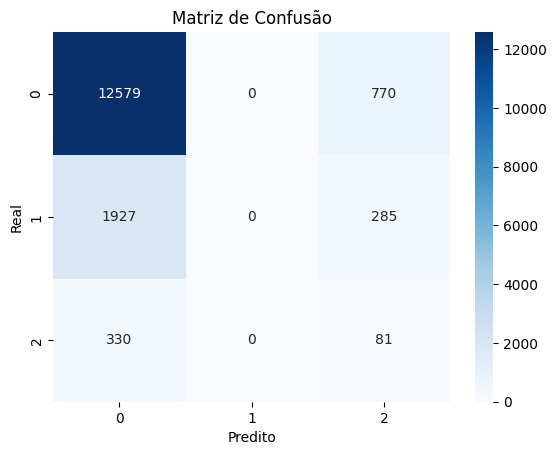

In [17]:
sns.heatmap(Matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Claramente nota ser necessário ser realizado um trabalho de engenharia de recurso de balanceamento de target para obter melhor métrica para as classes de menor quantidade e outra abordagem com valores nulos
 